## Initialize Session

This section calls the MajoranaSimulation class and loads your IBM Quantum account information.
To run an experiment on the backend or noisy simulation, please replace the placeholders for `api key`, `hub`, `group`, `project` with your information.

In [1]:
from MajoranaSimulation import MajoranaSimulation

#please enter your IBMQ account information below
api_key = 'your_api_key'
hub = 'your_hub' #e.g. 'ibm-q'
group = 'your_group' #e.g. 'open'
project = 'your_project' #e.g. 'main'

msim = MajoranaSimulation(api_key,hub,group,project)

If you have logged in before, set `reload = False`. If you haven't logged in before or want to load new account credentials, set `reload = True`

In [2]:
reload = True
msim.load_account(reload)

## Run Simulation

This section runs a simulation based on parameters you set. Some important parameters include:

**Physical Parameters**
* `experiment` (str; the experiment you want to run: `'wavefunction'`, `'braiding'`, or `'two_point_correlation'`)
* `n_qubits` (int; number of qubits)
* `n_cycles` (int; maximum number of times the Floquet unitary is applied. Equal to `D-1` in the paper)
* `theta` (float; RXX gate angle $\theta$)
* `phi` (float; RZ gate angle $\phi$)
* `eta` (float; RZZ gate angle $\varphi$, used to introduce interactions)
* `alpha` (float; NB: ONLY FOR BRAIDING. Gate angle for the braiding gate (see paper))
  
**Hardware Parameters**
* `n_shots` (number of times each circuit is run on the simulator. Default is 8192)
* `layout` (list; the indices of the actual qubits you want to map your virtual qubits to, if doing a noisy simulation)
* `noise_type` (str or None; options are `None` (for noiseless sim) and `'backend_model'` (for noisy sim))
* `backend_to_simulate` (str; the name of the backend whose noise model you want to simulate, ONLY if doing a noiseless simulation)

In [4]:
# run a simulation
msim.backend = 'qasm_simulator'

# specify the type of experiment: 'wavefunction', 'braiding', or 'two_point_correlation'
msim.experiment = 'wavefunction'

# Option 1: for a noiseless simulation
msim.noise_type = None

# Option 2: for a noisy simulation
# msim.noise_type = 'backend_model'
# msim.backend_to_simulate = 'ibm_perth'

# set experiment parameters
msim.n_qubits = 6
msim.n_cycles = 10

# run simulation
msim.execute()

# print results
msim.results

{'x_axis': range(0, 6),
 'theory for left ZX': array([0.84104636, 0.34834246, 0.14418975, 0.05947733, 0.02403326,
        0.00849726]),
 'theory for left ZY': array([0.34834246, 0.14418975, 0.05947733, 0.02403326, 0.00849726,
        0.        ]),
 'theory for right ZX': array([0.00849726, 0.02403326, 0.05947733, 0.14418975, 0.34834246,
        0.84104636]),
 'theory for right ZY': array([0.        , 0.00849726, 0.02403326, 0.05947733, 0.14418975,
        0.34834246]),
 'experiment for left ZX': array([0.85145355, 0.35990306, 0.14911436, 0.07142209, 0.04860707,
        0.04881783]),
 'experiment for left ZY': array([0.30642211, 0.13104149, 0.03401177, 0.00113285, 0.02363173,
        0.02513341]),
 'experiment for right ZX': array([0.04416102, 0.04516228, 0.07604338, 0.1483452 , 0.35531704,
        0.85104822]),
 'experiment for right ZY': array([0.02482081, 0.02347701, 0.00250316, 0.03549218, 0.13253576,
        0.31255252])}

## Run Experiment on Quantum Device

This section runs an experiment based on parameters you set. Some important parameters include:

**Physical Parameters**
* `experiment` (str; the experiment you want to run: 'wavefunction', 'braiding', or 'two_point_correlation')
* `n_qubits` (int; number of qubits)
* `n_cycles` (int; maximum number of times the Floquet unitary $U_F$ is applied. Equal to `D-1` in the paper)
* `theta` (float; $RXX(\theta)$ gate angle)
* `phi` (float; $RZ(\phi)$ gate angle)
* `eta` (float; $RZZ(\varphi)$ gate angle, used to introduce interactions)
* `alpha` (float; NB: ONLY FOR BRAIDING. Gate angle for the braiding gate (see paper))
  
**Hardware Parameters**
* `n_shots` (number of times each circuit is run on the backend. Default is 8192)
* `layout` (list; the indices of the actual qubits you want to map your virtual qubits to)
* `backend` (str; the name of the backend you want to use)

In [ ]:
# run an experiment on a quantum device
msim.backend = 'ibmq_lagos'

# first, specify the experiment: 'wavefunction', 'braiding', or 'two_point_correlation'
msim.experiment = 'two_point_correlation'

# set experiment parameters
msim.n_qubits = 6
msim.n_cycles = 10
msim.layout = [0,1,2,3,4,5]

# run experiment
msim.execute()

# print results
msim.results

## Save Data

This section saves simulation/experimental data generated above to the directory `./Data/your_folder_name`. 

In [5]:
# specify destination file
directory = './Data/your_folder_name'

# save data
msim.save_data(directory)

Wavefunction data saved successfully to ./Data/your_folder_name


## Load Data

This section loads previously stored data from a specified folder. You have the following options:
1. `./Data/your_folder_name`: loads the simulation/experimental data generated above
2. `./paper_data/insert_experiment_name/figxx`: loads existing data for Fig. xx

In [9]:
# specify load directory
directory = './paper_data/wavefunction/fig2a'

# load data
msim.load_data(directory)

#print experimental parameters
msim.params

wavefunction data loaded successfully from ./paper_data/wavefunction/fig2a


{'theory': 'adapted from Oles "majorana_modes" code',
 'regime': 'MZM',
 'num_qubits': 10,
 'num gate cycles': 10,
 'num_shots': 8192,
 'device': 'ibmq_montreal',
 'backend_to_simulate': None,
 'noise_type': None,
 'layout': [1, 2, 3, 5, 8, 11, 14, 16, 19, 22],
 'theta': 0.25,
 'phi': 0.125,
 'eta': 0.0,
 'experiment': 'wavefunction'}

## Plot Data

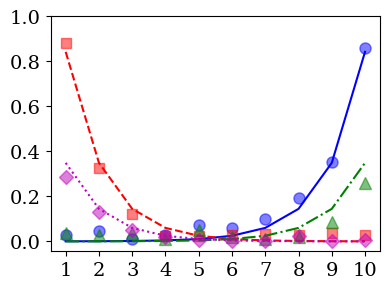

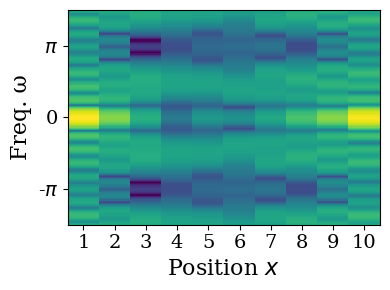

In [10]:
msim.plot_data()